In [1]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

from main import ENVIRONMENT

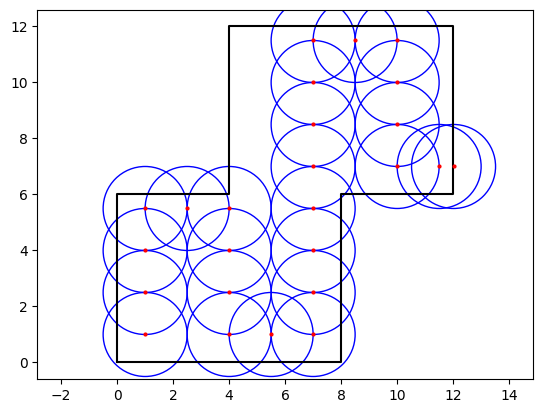

In [2]:
x, y = ENVIRONMENT.exterior.xy
plt.figure()
plt.axis("equal")
plt.plot(x, y, color="black")


with open("visited.txt", "r") as f:
    for line in f:
        vx, vy = map(float, line.strip().split(","))
        plt.plot(vx, vy, marker="o", color="red", markersize=2)
        c = plt.Circle((vx, vy), 1.5, color="blue", fill=False)
        plt.gca().add_artist(c)


plt.show()